<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/05_CompterVision/01_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV



## Getting started with OpenCV

In [ ]:
import cv2 #opencv library

Load images using `cv.imread(”path”,flag)`

In [ ]:
img=cv2.imread("/content/sample.webp",1)
img

array([[[ 71,  77,  33],
        [ 71,  77,  33],
        [ 71,  77,  33],
        ...,
        [135, 137,  23],
        [135, 137,  23],
        [134, 136,  22]],

       [[ 71,  77,  33],
        [ 71,  77,  33],
        [ 71,  77,  33],
        ...,
        [135, 137,  23],
        [135, 137,  23],
        [134, 136,  22]],

       [[ 71,  77,  33],
        [ 71,  77,  33],
        [ 71,  77,  33],
        ...,
        [135, 137,  23],
        [135, 137,  23],
        [134, 136,  22]],

       ...,

       [[ 91, 123, 102],
        [ 91, 123, 102],
        [ 91, 123, 102],
        ...,
        [ 69, 116,  92],
        [ 69, 116,  92],
        [ 73, 117,  94]],

       [[ 91, 123, 102],
        [ 91, 123, 102],
        [ 91, 123, 102],
        ...,
        [ 69, 116,  92],
        [ 69, 116,  92],
        [ 73, 117,  94]],

       [[ 91, 123, 102],
        [ 91, 123, 102],
        [ 91, 123, 102],
        ...,
        [ 69, 116,  92],
        [ 69, 116,  92],
        [ 73, 117,  94]]

In [ ]:
img.shape #(height, width, channels)

(2000, 1333, 3)

View images using `cv2.imshow("Window title",image)` `cv2.waitKey(0)`
 `cv2.destroyAllWindows()`

In [ ]:
#cv2.imshow("bird",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
img[0,1332] #the pixel value [B,G,R] of the top right of the image is displayed

array([134, 136,  22], dtype=uint8)

In Google Colab (or Jupyter), cv2.imshow() doesn’t work because it opens a GUI window, which the notebook environment doesn’t support.

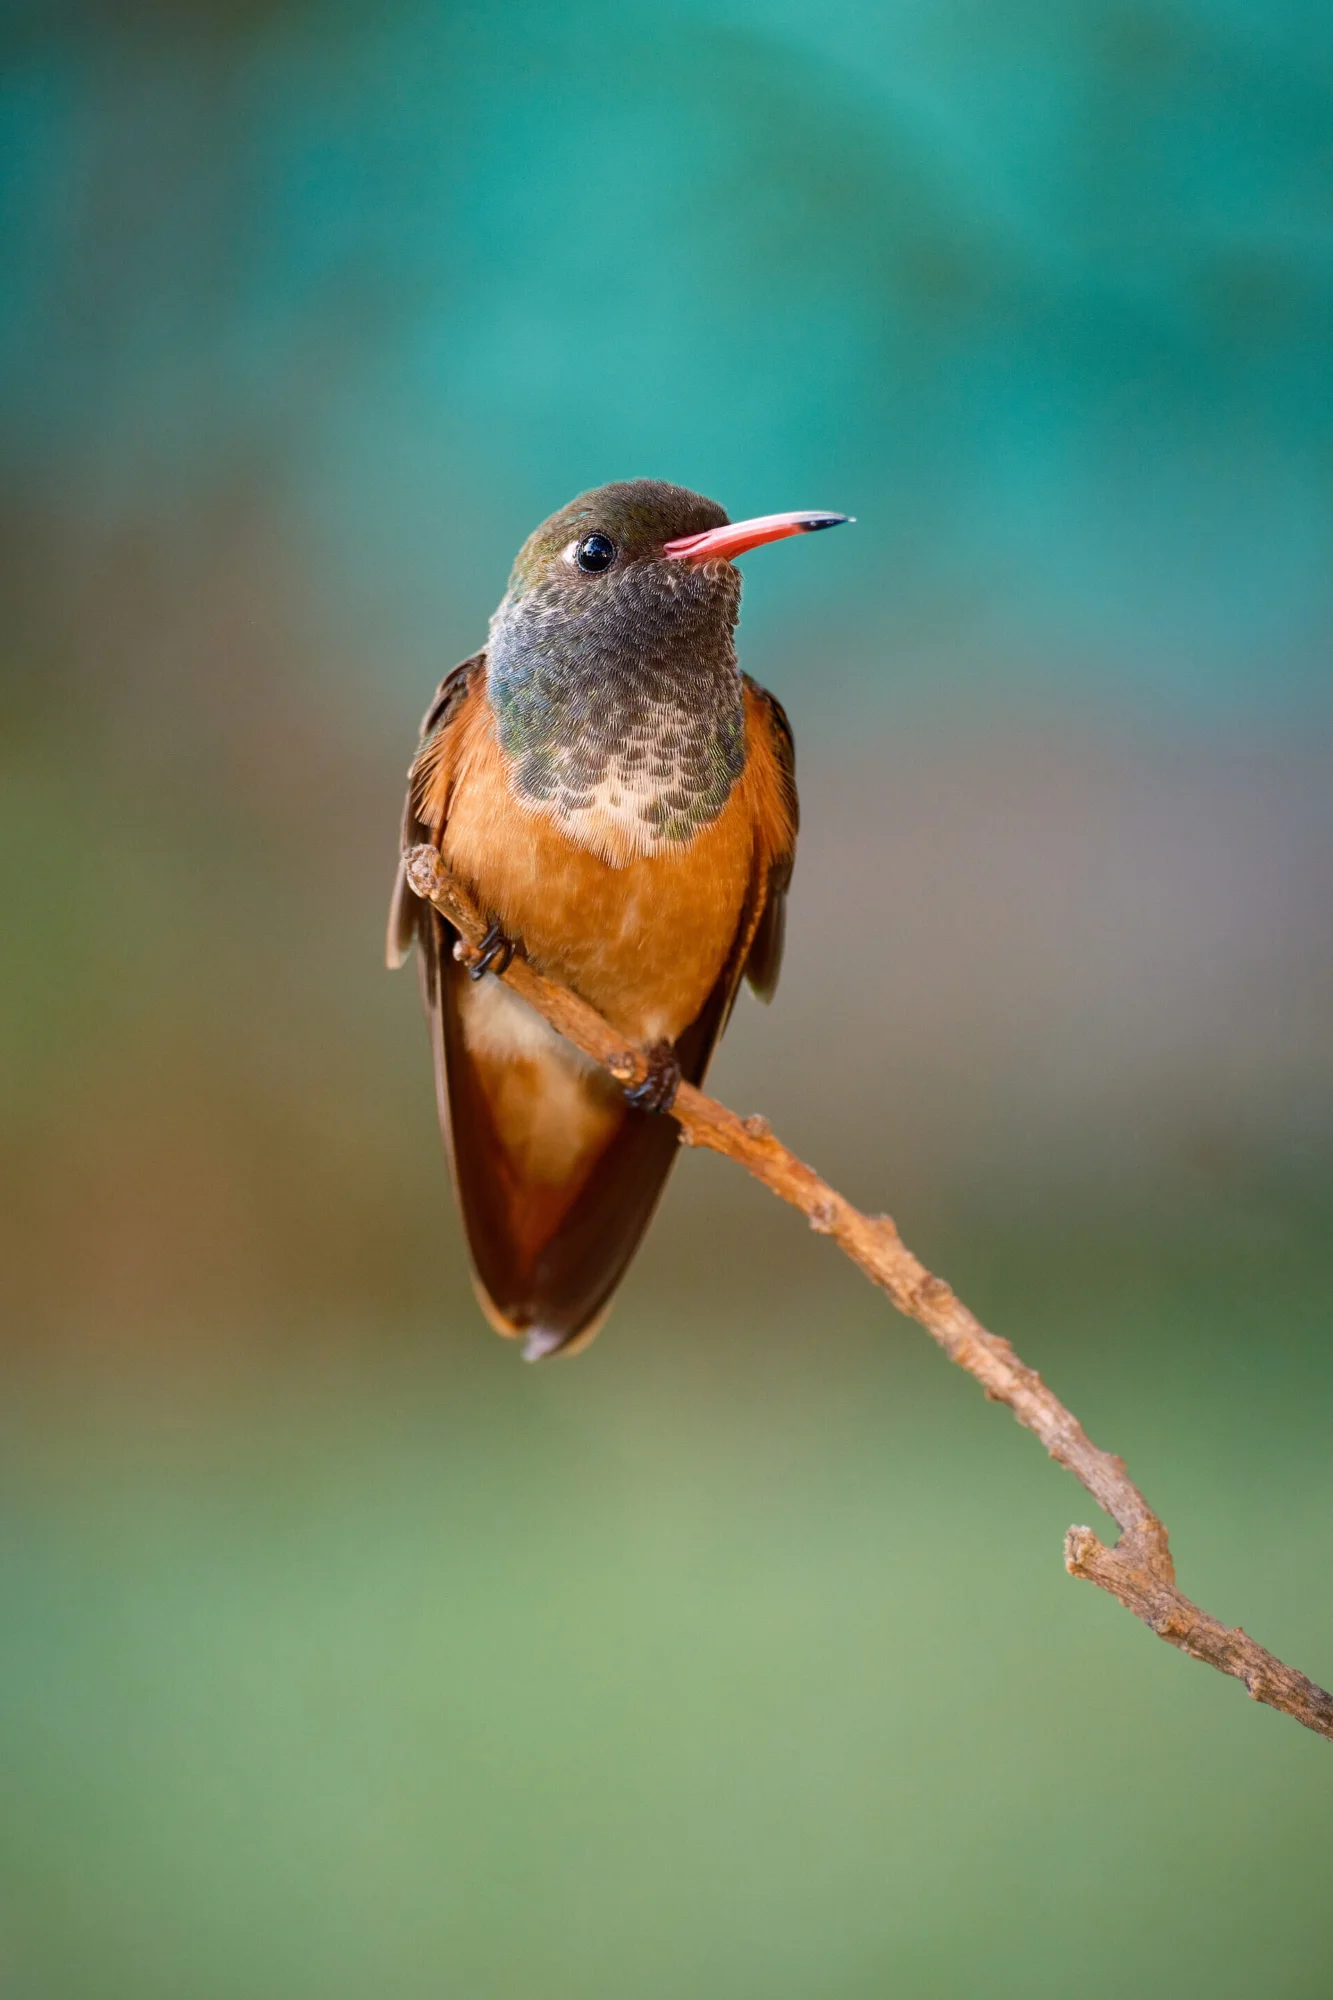

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)   # instead of cv2.imshow

or use matplotlib

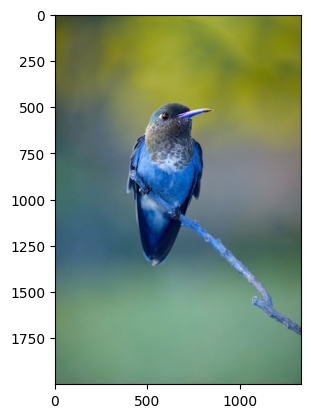

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img) #the difference in color is because imread loads image in BGR

Convert color `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

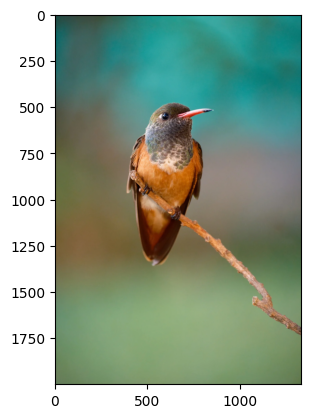

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

`cv2.imwrite()`  saves an image from memory (NumPy array) to a file on disk.

In [ ]:
cv2.imwrite("output.png", img)   # saves as PNG, lossless, bigger size, supports transparency.
cv2.imwrite("output.jpg", img)   # saves as JPEG , lossy, smaller file size.

True

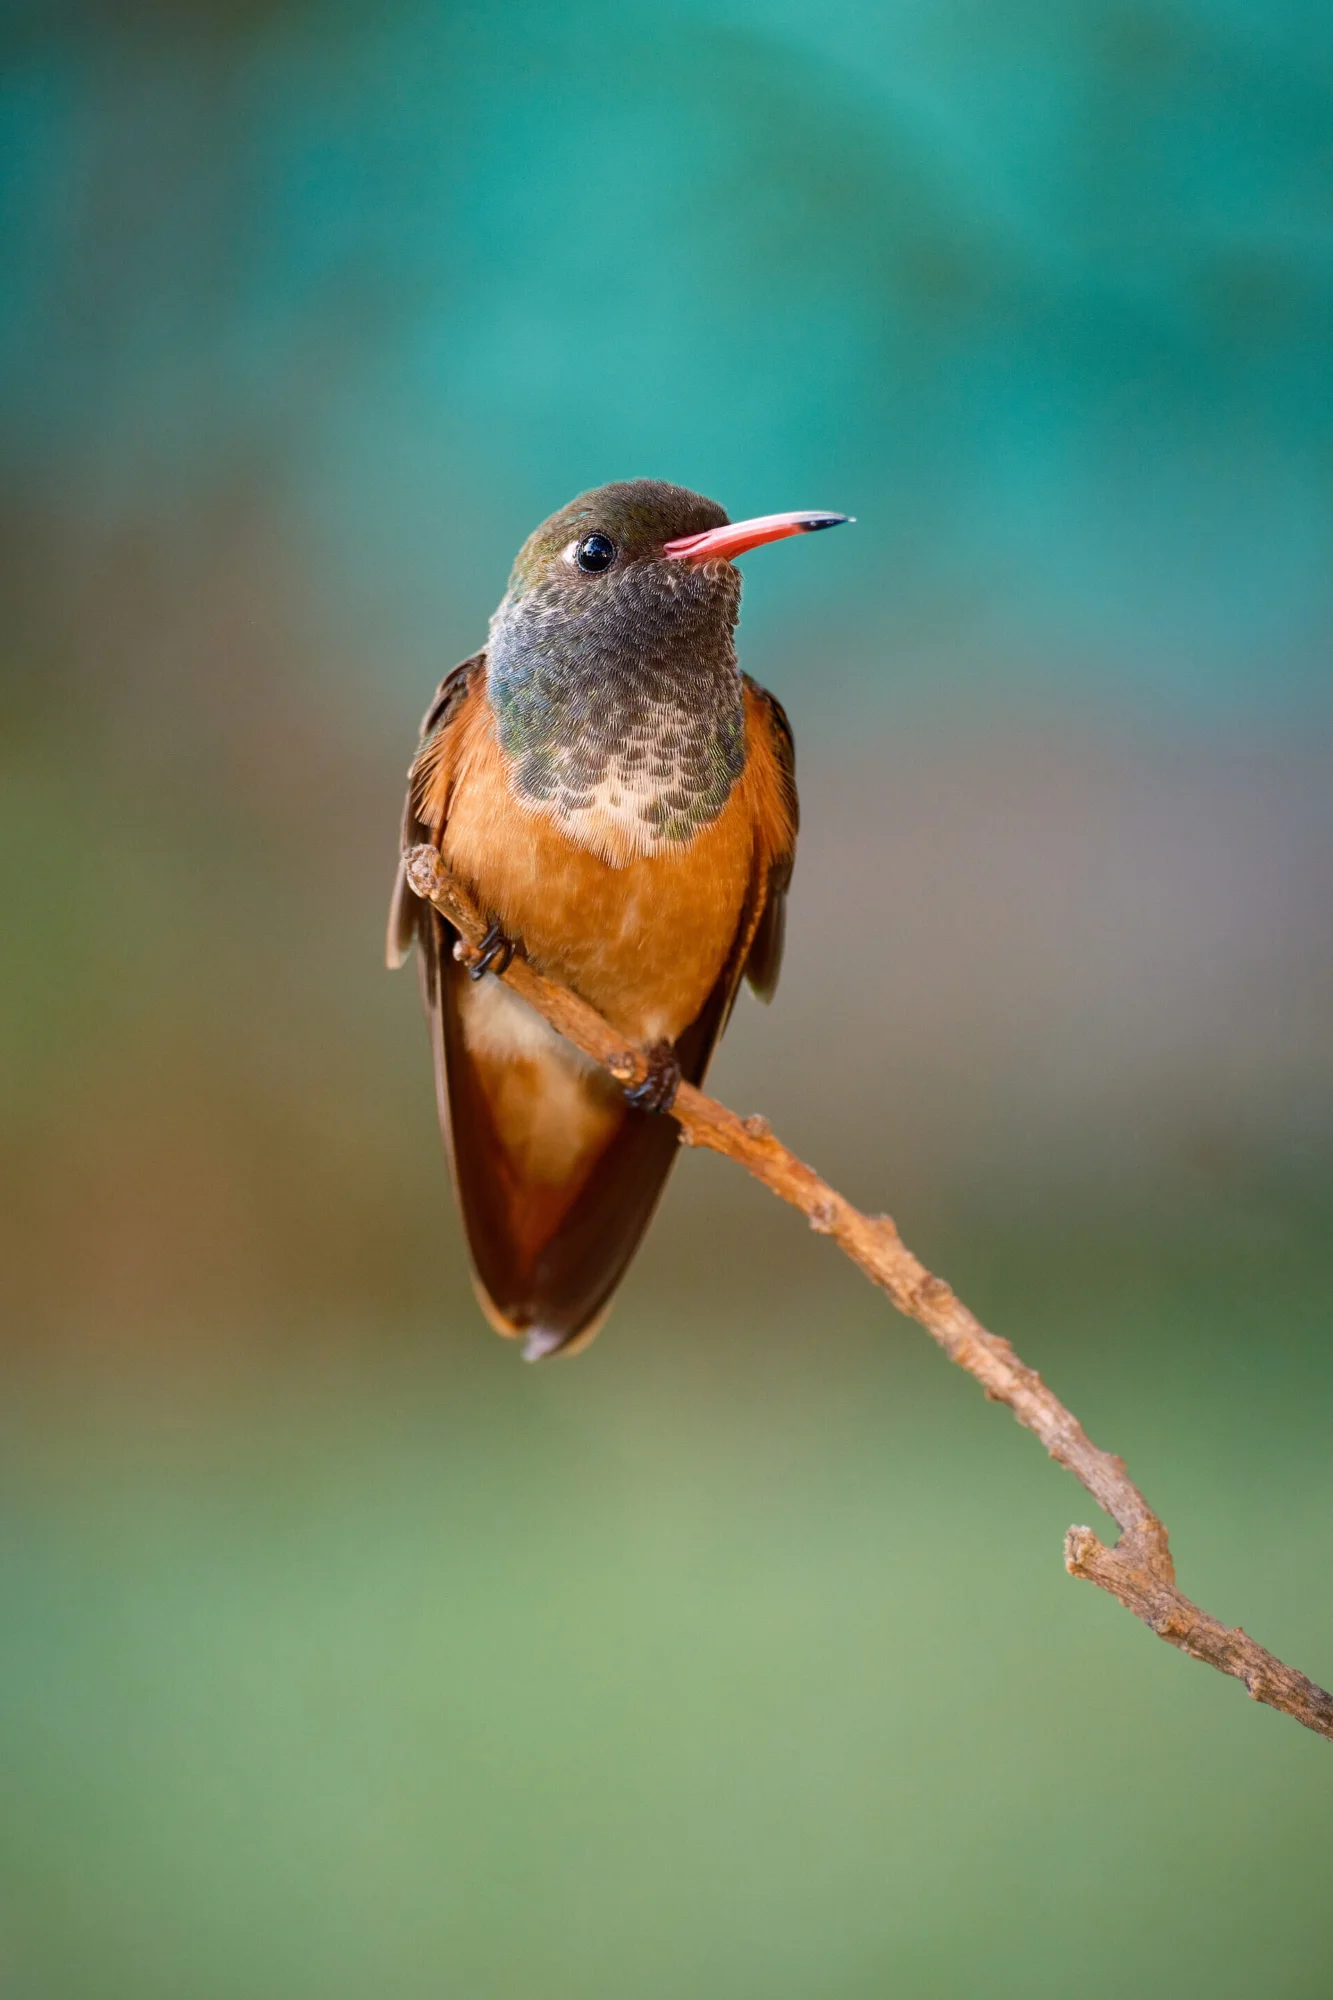

In [ ]:
saved_image=cv2.imread("/content/output.png")
cv2_imshow(saved_image)

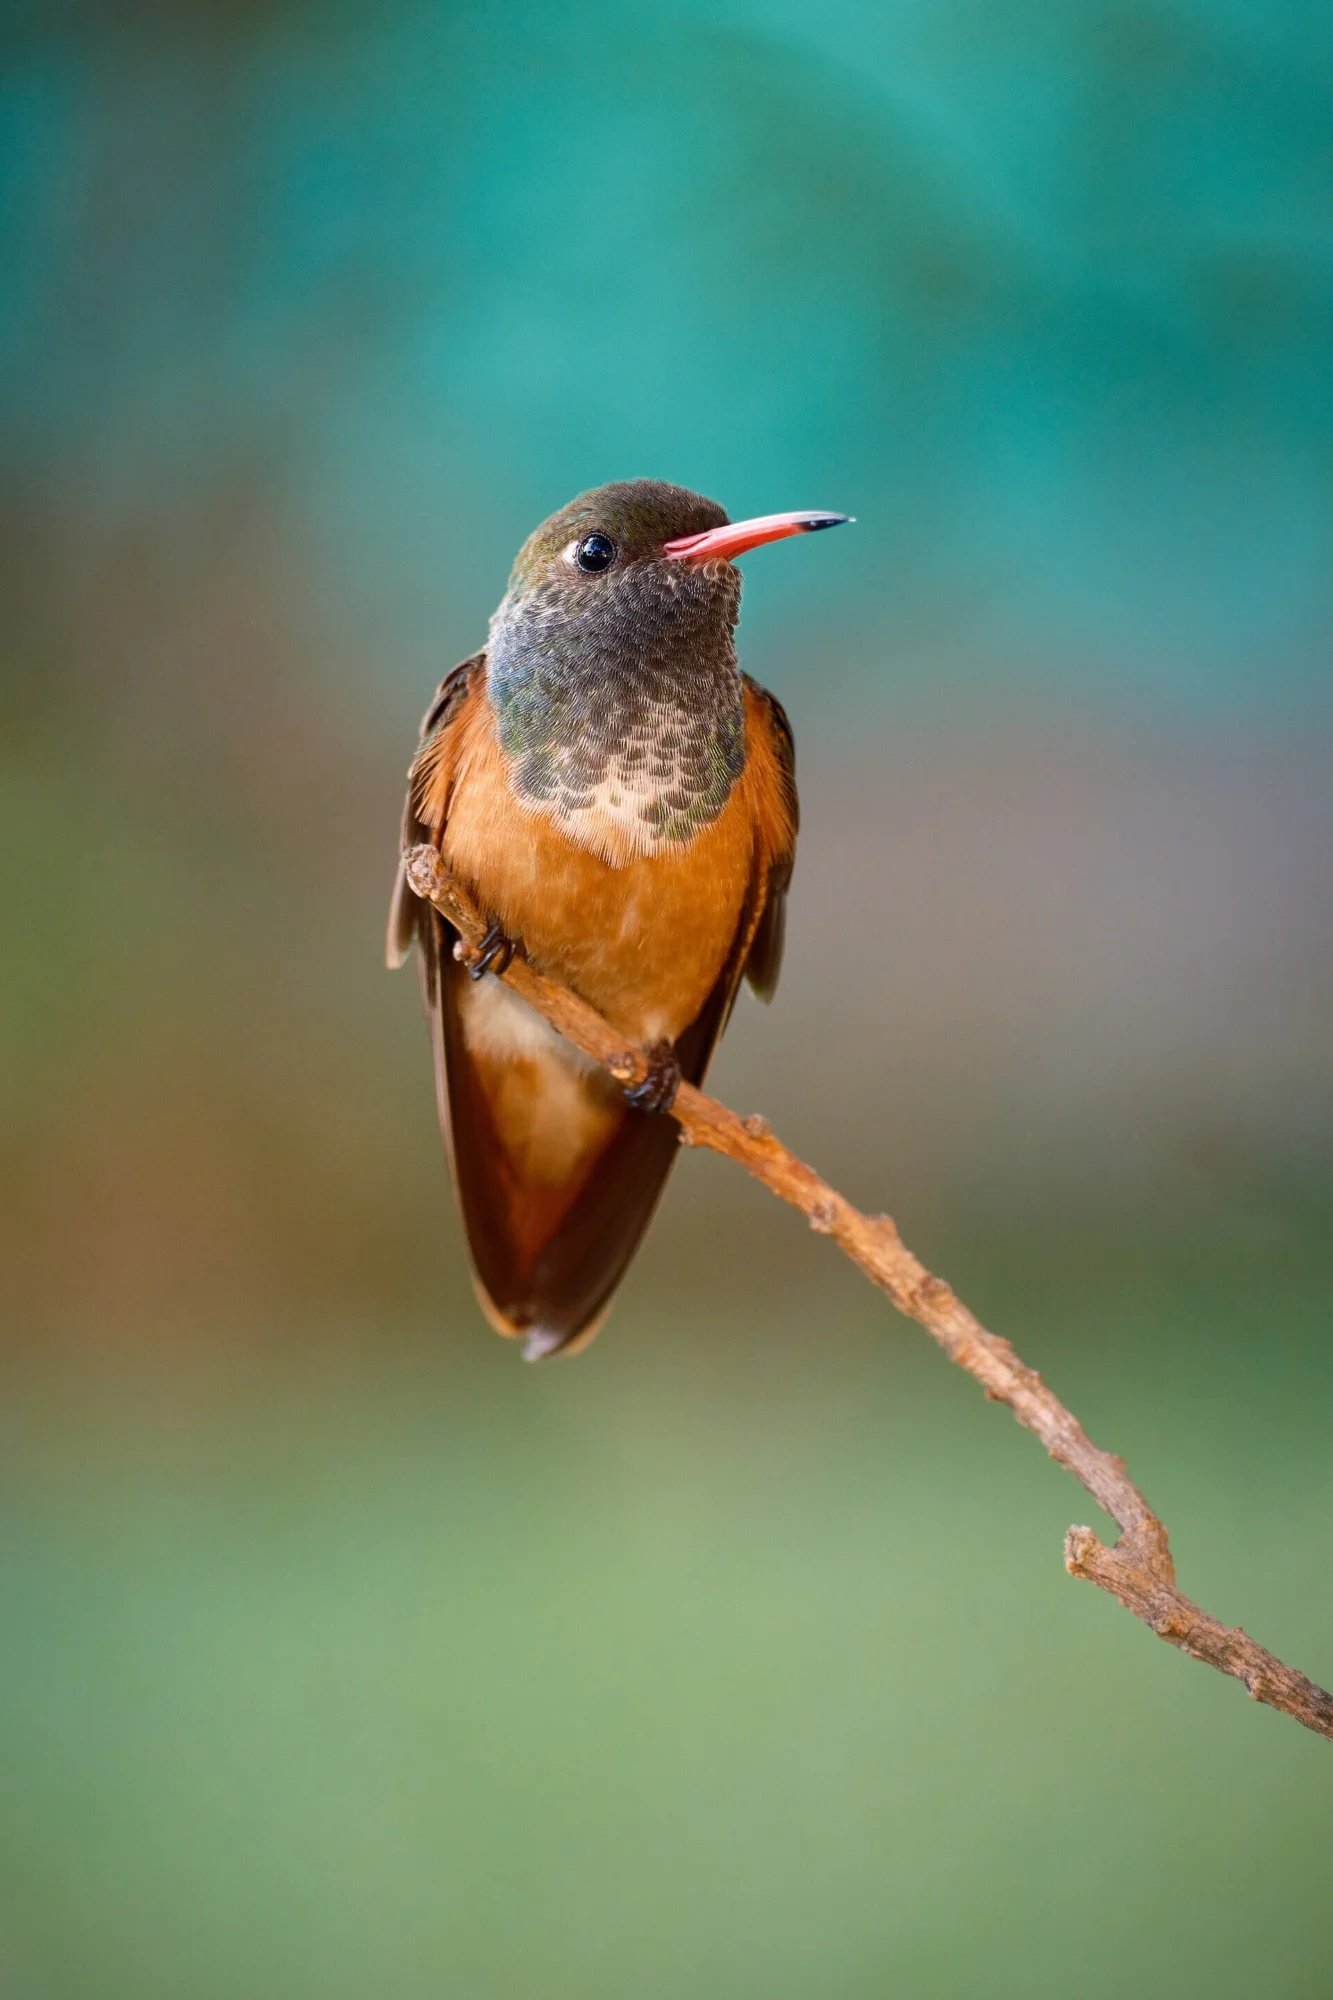

In [ ]:
saved_image=cv2.imread("/content/output.jpg")
cv2_imshow(saved_image)

## Image transformation and manipulation

In [ ]:
square_image=cv2.resize(img,[4000,4000],interpolation=1)

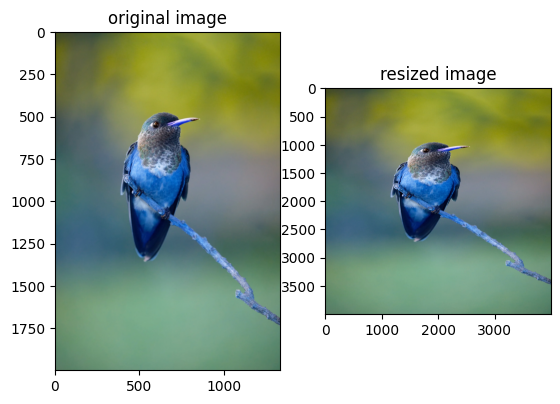

In [ ]:
plt.subplot(1, 2, 1)   # (rows, columns, position)
plt.imshow(img)
plt.title("original image")
plt.axis("on")

plt.subplot(1, 2, 2)
plt.imshow(square_image)
plt.title("resized image")
plt.axis("on")

plt.show()

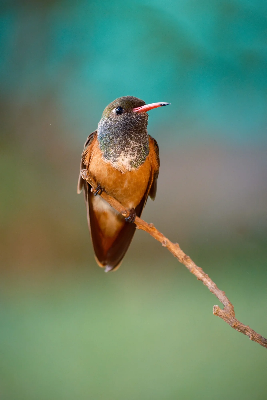

In [ ]:
half = cv2.resize(img, (0, 0), fx=0.2, fy=0.2)  # half size
cv2_imshow(half)

In [ ]:
half.shape

(400, 267, 3)

Crop images

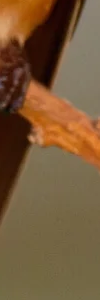

In [ ]:
cropped=img[1000:1300,650:750]
cv2_imshow(cropped)

Rotate images

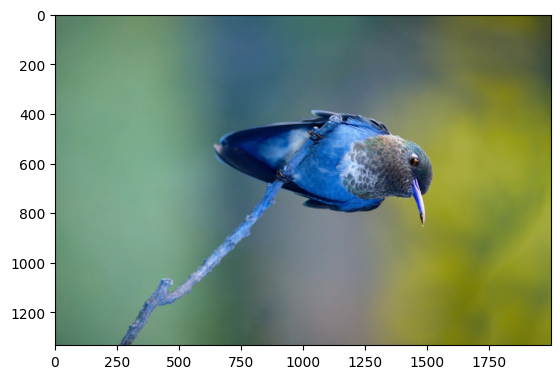

In [ ]:
rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated)

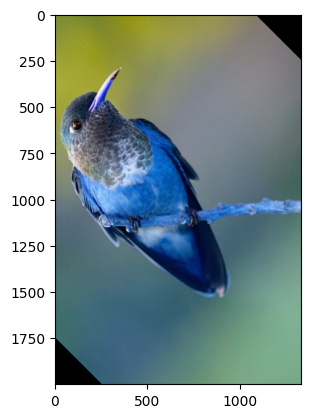

In [ ]:
# if angle is not 90,180,270 then use other cv2 functions
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
rotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(rotated)

Flip images

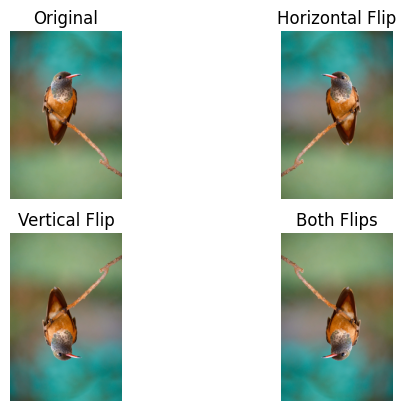

In [ ]:
flip_h = cv2.flip(img, 1) #horizontal (left-right)
flip_v = cv2.flip(img, 0)  #vertical (up-down)
flip_both = cv2.flip(img, -1) #both

# Convert from BGR to RGB for plt
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
flip_h_rgb = cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB)
flip_v_rgb = cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB)
flip_both_rgb = cv2.cvtColor(flip_both, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(flip_h_rgb)
plt.title("Horizontal Flip")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(flip_v_rgb)
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(flip_both_rgb)
plt.title("Both Flips")
plt.axis("off")

plt.show()

## Basic image drawing techniques

      cv2.line, cv2.rectangle, cv2.circle, cv2.putText

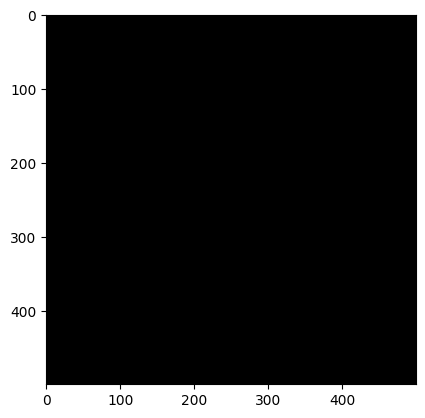

In [ ]:
# Create a blank black image
import numpy as np
img = np.zeros((500, 500, 3), dtype="uint8")
plt.imshow(img)

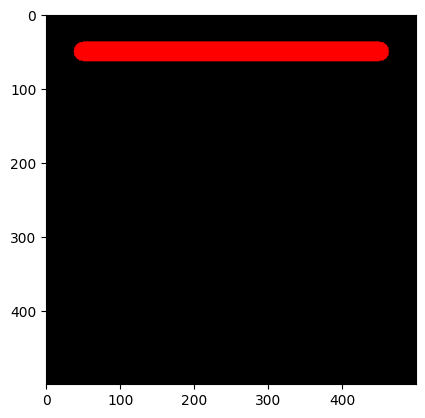

In [ ]:
# Draw a line (start_point, end_point, color, thickness)
cv2.line(img, (50, 50), (450, 50), (255, 0, 0), 25)
plt.imshow(img)

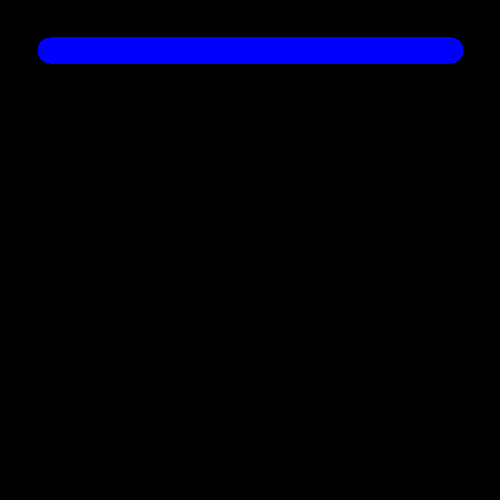

In [ ]:
cv2_imshow(img) #cv2 uses BGR

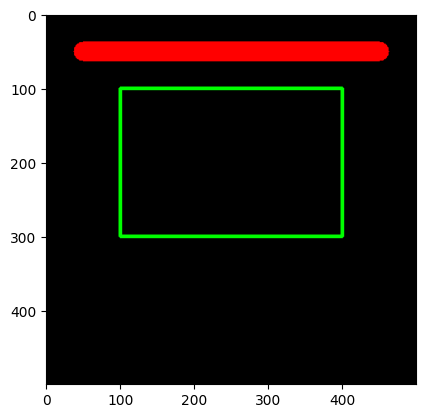

In [ ]:
# Draw a rectangle (top-left, bottom-right, color, thickness)
cv2.rectangle(img, (100, 100), (400, 300), (0, 255, 0), 3)
plt.imshow(img)

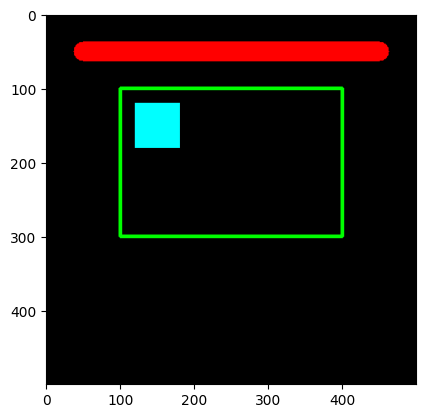

In [ ]:
# Draw a filled rectangle
cv2.rectangle(img, (120, 120), (180, 180), (0, 255, 255), -1)
plt.imshow(img)

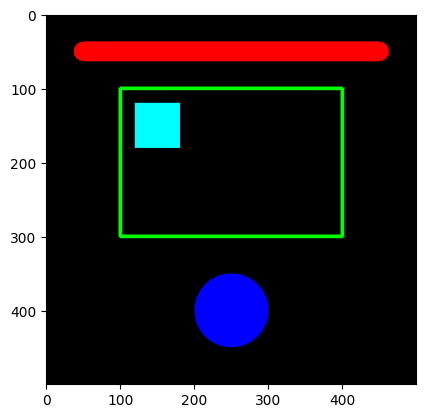

In [ ]:
# Draw a circle (center, radius, color, thickness)
cv2.circle(img, (250, 400), 50, (0, 0, 255), -1)
plt.imshow(img)

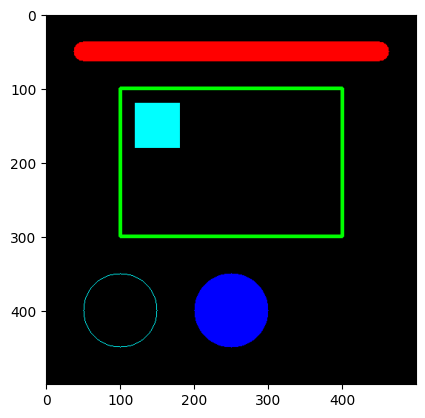

In [ ]:
# Draw a circle (center, radius, color, thickness)
cv2.circle(img, (100, 400), 50, (0, 255, 255), 1)
plt.imshow(img)

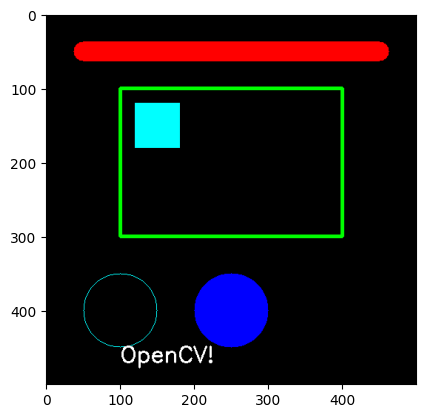

In [ ]:
#cv2.putText(img, text, org, fontFace, fontScale, color, thickness)
cv2.putText(img, "OpenCV!", (100, 470), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
plt.imshow(img)

## Working with Video & Webcam

      cv2.VideoCapture(), video.read(), video.release()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

google colab doesnt support cv2.imshow() try running this code locally

In [ ]:
#import cv2

## Open webcam (0) or video file
#cap = cv2.VideoCapture(0)

#while True:
    #ret, frame = cap.read()  # ret=True if frame read successfully
    #if not ret:
        #break

    #cv2.imshow("Video", frame)

    #if cv2.waitKey(1) & 0xFF == ord('q'):  # press q to quit
        #break

#cap.release()
#cv2.destroyAllWindows()

Webcam ->

       cv2.VideoCapture(0) → to grab frames from webcam

      cv2.VideoWriter → to save those frames into a video file

Frame by frame processing

Run it locally as google colab doesnt support few cv2 functions

In [ ]:
# import cv2

# # Open webcam
# input = cv2.VideoCapture(0)

# # Get default resolution of the webcam
# width  = int(input.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(input.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # or 'MJPG', 'mp4v'
# fps = input.get(cv2.CAP_PROP_FPS)
# print(fps) #30
# output = cv2.VideoWriter("output.avi", fourcc, fps, (width, height)) #use fps <30 for slomo and >30 for fast motion videos

# while True:
#     ret, frame = input.read()
#     if not ret:
#         break

#     # Write the frame to file
#     output.write(frame)

#     # Show the recording
#     cv2.imshow("Recording", frame)

#     # Press 'q' to stop recording
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release everything
# input.release()
# output.release()
# cv2.destroyAllWindows()

## Image filtering and blurring

Image filtering is the general name for operations where you take an image and apply a kernel (small matrix) that slides over the pixels, combining neighbors to produce a new value.

- If the kernel averages → you get blurring.

- If it enhances edges (like Sobel, Laplacian) → you get edge detection.

- If it sharpens → details pop out more.

You can even build custom filters to highlight certain patterns.

So at its core: filtering = convolution (or correlation) of image with a kernel.

Blurring in OpenCV means replacing each pixel with a value based on its neighbors, which smooths out edges and noise.
- Different methods exist: **Average Blur** (simple mean), **Gaussian Blur** (weighted mean with center emphasized), **Median Blur** (uses median, great for salt-and-pepper noise), and **Bilateral Filter** (smooths but preserves edges).
- It’s basically “pixel averaging” with different rules, making images look softer or cleaner.


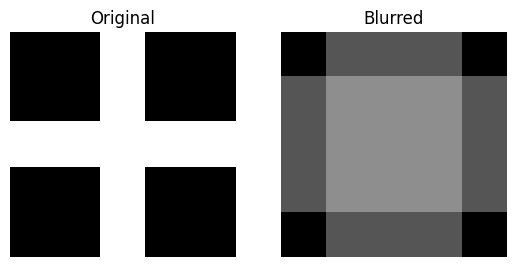

(array([[  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [255, 255, 255, 255, 255],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0]], dtype=uint8),
 array([[  0,  85,  85,  85,   0],
        [ 85, 142, 142, 142,  85],
        [ 85, 142, 142, 142,  85],
        [ 85, 142, 142, 142,  85],
        [  0,  85,  85,  85,   0]], dtype=uint8))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create toy 5x5 image with a cross
img = np.zeros((5, 5), dtype=np.uint8)
img[2, :] = 255
img[:, 2] = 255

# Apply average blur with 3x3 kernel
blur = cv2.blur(img, (3, 3))

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blur, cmap="gray", vmin=0, vmax=255)
plt.title("Blurred")
plt.axis("off")

plt.show()

img, blur

How Median Blur Works

- Pick a window size (say 3×3).
- For every pixel, take the values of that pixel and its neighbors.

- Put them in a list.

- Sort the list.

- The middle value (median) becomes the new pixel value.

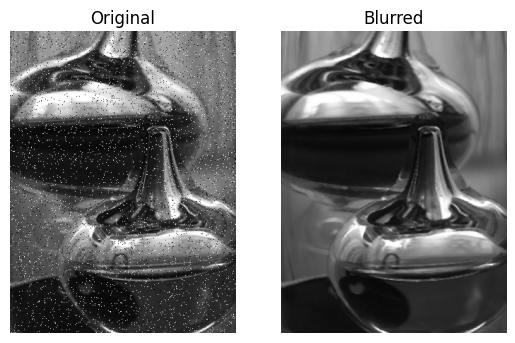

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('/content/Noise_salt_and_pepper.png')

# Apply median blur for pepper and salt noise
blur = cv2.medianBlur(img, 3)

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blur, cmap="gray", vmin=0, vmax=255)
plt.title("Blurred")
plt.axis("off")

plt.show()

sharpening

- Sharpening is used to highlight edges and fine details in an image by increasing contrast between neighboring pixels.
- It’s done by applying a kernel (filter) that amplifies high-frequency components (edges, textures).
- Common approach: subtract the blurred (smoothed) version from the original to emphasize sharpness.

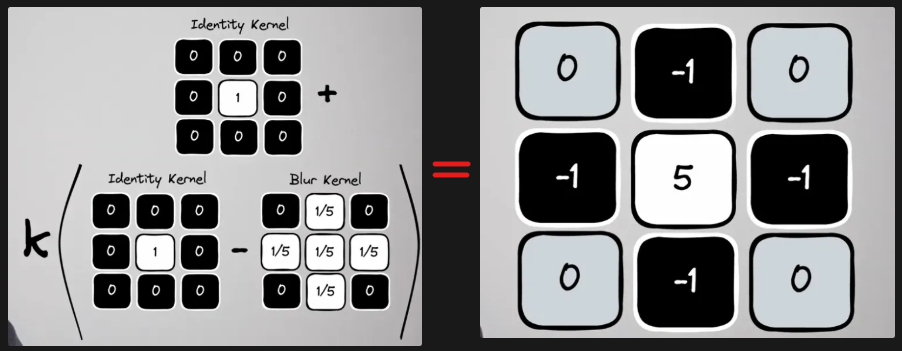


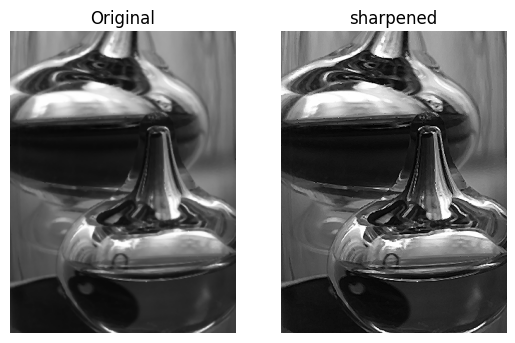

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

# Sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(blur, -1, kernel)

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(blur, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap="gray", vmin=0, vmax=255)
plt.title("sharpened")
plt.axis("off")

plt.show()